In [205]:
import pandas as pd

fs_path = r'./Data/quant/재무제표데이터.xlsx'

In [206]:
raw_data = pd.read_excel(fs_path, index_col=0)
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

In [207]:
new_big_col = []
for num, col in enumerate(big_col):
    if 'Unnamed' in col:
        new_big_col.append(new_big_col[num-1])
    else:
        new_big_col.append(big_col[num])

raw_data.columns = [new_big_col, small_col]
fs_df = raw_data.loc[raw_data.index.dropna()]
fs_df.head()

2011/12                                       2012/02            ...  \
          당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름   자본   자산   당기순이익  매출액   부채  ...   
A060310     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A095570     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A068400     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A006840     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A054620     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   

             2018/11           2018/12                                        
        영업활동으로인한현금흐름   자본   자산   당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름   자본   자산  
A060310          NaN  NaN  NaN      -4  231  242   -2            2  322  564  
A095570          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  
A068400          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  
A006840          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  
A054620          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  

[5 rows x 266 columns]

In [208]:
def get_finance_data(path):
    data_path=path
    raw_data=pd.read_excel(data_path, index_col=0)  # index_col=0  ???
    big_col=list(raw_data.columns)
    small_col=list(raw_data.iloc[0])
    
    new_big_col=[]
    for num, col in enumerate(big_col):
        if 'Unnamed' in col:
            new_big_col.append(new_big_col[num-1])
        else:
            new_big_col.append(big_col[num])
    
    raw_data.columns = [new_big_col, small_col]
    clean_df = raw_data.loc[raw_data.index.dropna()]
    
    return clean_df

In [209]:
fs_path = r'./Data/quant/재무제표데이터.xlsx'
fs_df = get_finance_data(fs_path)
fr_path = r'./Data/quant/재무비율데이터.xlsx'
fr_df = get_finance_data(fr_path)
invest_path = r'./Data/quant/투자지표데이터.xlsx'
invest_df = get_finance_data(invest_path)

In [210]:
print(fs_df.head())
print('-----'*30)
print(fr_df.head())
print('-----'*30)
print(invest_df.head())

        2011/12                                       2012/02            ...  \
          당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름   자본   자산   당기순이익  매출액   부채  ...   
A060310     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A095570     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A068400     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A006840     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   
A054620     NaN  NaN  NaN  NaN          NaN  NaN  NaN     NaN  NaN  NaN  ...   

             2018/11           2018/12                                        
        영업활동으로인한현금흐름   자본   자산   당기순이익  매출액   부채 영업이익 영업활동으로인한현금흐름   자본   자산  
A060310          NaN  NaN  NaN      -4  231  242   -2            2  322  564  
A095570          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  
A068400          NaN  NaN  NaN     NaN  NaN  NaN  NaN          NaN  NaN  NaN  
A006840          NaN  NaN  NaN     NaN  NaN 

In [211]:
invest_df[('2014/12','PER')]=pd.to_numeric(invest_df[('2014/12','PER')])
per_sorted = invest_df.sort_values(by=('2014/12','PER'))
per_sorted['2014/12'].head()

,PBR,PCR,PER,PSR,총현금흐름
A030790,0.6,0.12,0.12,0.12,44
A006390,1.25,0.21,0.22,0.19,643
A001520,0.49,0.26,0.26,0.44,309
A011810,1.59,0.31,0.32,0.07,445
A151910,0,0.01,0.36,0,186


### N/A(IFRS) 제거

In [212]:
import numpy as np

def check_IFRS(x):
    if x=='N/A(IFRS)':
        return np.NaN
    else:
        return x

fr_df[('2014/12','ROA')]=fr_df[('2014/12','ROA')].apply(check_IFRS)

In [213]:
fr_df[('2014/12','ROA')]=pd.to_numeric(fr_df[('2014/12','ROA')])
sorted_roa = fr_df.sort_values(by=('2014/12','ROA'), ascending=False)
sorted_roa['2014/12'].head()

,ROA,ROIC,부채비율,영업이익률,유동비율
A226320,84.2,NaN,92.9,41,196.1
A030790,81.6,NaN,261.8,0.5,134.9
A192080,80.3,5806.9,22.7,41.1,607.7
A214270,80.2,444.4,52.7,23.0,279.3
A001520,64.7,9.3,121.5,6.3,100.9


#### PER기준 오름차순 정렬, ROA 내림차순 Def

In [214]:
def low_per(invest_df, index_date, num):
    invest_df[(index_date, 'PER')]=pd.to_numeric(invest_df[(index_date,'PER')])
    per_sorted=invest_df.sort_values(by=(index_date,'PER'))
    return per_sorted[index_date][:num]

def high_roa(fr_df, index_date, num):
    fr_df[(index_date,'ROA')]=fr_df[(index_date,'ROA')].apply(check_IFRS)
    fr_df[(index_date,'ROA')]=pd.to_numeric(fr_df[(index_date, 'ROA')])
    sorted_roa=fr_df.sort_values(by=(index_date,'ROA'), ascending=False)
    return sorted_roa[index_date][:num]

In [215]:
low_per(invest_df, '2016/12', 10)

,PBR,PCR,PER,PSR,총현금흐름
A001470,0.24,0.11,0.11,0.07,-331
A151910,3.85,0.16,0.19,0.14,-454
A084110,1,0.58,0.59,1.86,297
A101000,0.16,0.63,0.79,0.06,144
A032940,0.58,0.84,0.86,1.11,38
A003080,0.71,1.49,1.51,1.95,19
A005960,0.83,1.48,1.58,0.14,201
A000230,1.69,1.57,1.64,10.72,87
A030530,0.86,2.06,2.24,1.51,572
A155900,0.88,2.15,2.36,4.46,54


In [216]:
date = '2015/12'
per = low_per(invest_df,date,None)
roa = high_roa(fr_df, date, None)

In [217]:
per['per순위'] = per['PER'].rank()
roa['roa순위'] = roa['ROA'].rank(ascending=False)

In [218]:
(per['per순위'] + roa['roa순위']).sort_values()

A014470     3.0
A121440     3.0
A001520     9.0
A009180    19.0
A072870    45.0
           ... 
A900340     NaN
A950110     NaN
A950140     NaN
A950160     NaN
A950170     NaN
Length: 2263, dtype: float64

In [219]:
(per['per순위'] + roa['roa순위']).rank().sort_values()

A014470    1.5
A121440    1.5
A001520    3.0
A009180    4.0
A072870    5.0
          ... 
A900340    NaN
A950110    NaN
A950140    NaN
A950160    NaN
A950170    NaN
Length: 2263, dtype: float64

In [220]:
magic = pd.merge(per, roa, how='outer', left_index=True, right_index=True)
magic['마법공식 순위'] = (magic['per순위'] + magic['roa순위']).rank().sort_values()
magic = magic.sort_values(by='마법공식 순위')

##### 마법공식 Def

In [221]:
def magic_formula(fr_df, invest_df, index_date, num):
    per = low_per(invest_df, index_date, None)
    roa = high_roa(fr_df, index_date, None)
    per['per순위'] = per['PER'].rank()
    roa['roa순위'] = roa['ROA'].rank(ascending=False)
    magic = pd.merge(per, roa, how='outer', left_index=True, right_index=True)
    magic['마법공식 순위'] = (magic['per순위'] + magic['roa순위']).rank().sort_values()
    magic = magic.sort_values(by='마법공식 순위')
    return magic[:num]

In [222]:
magic_formula(fr_df, invest_df, '2013/12', 10)

,PBR,PCR,PER,PSR,총현금흐름,per순위,ROA,ROIC,부채비율,영업이익률,유동비율,roa순위,마법공식 순위
A000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
def get_value_rank(invest_df, value_type, index_date, num):
    invest_df[(index_date, value_type)] = pd.to_numeric(invest_df[(index_date, value_type)])
    value_sorted = invest_df.sort_values(by=(index_date, value_type))[index_date]
    value_sorted[value_type+'순위'] = value_sorted[value_type].rank()
    return value_sorted[[value_type, value_type + '순위']][:num]

In [224]:
get_value_rank(invest_df, 'PBR', '2016/12', 20)

,PBR,PBR순위
A101000,0.16,1.0
A073010,0.17,2.0
A016610,0.22,3.0
A001470,0.24,5.0
A003300,0.24,5.0
A000950,0.24,5.0
A019010,0.26,7.0
A001530,0.27,8.0
A003480,0.28,9.5
A005010,0.28,9.5


#### 저PER, 저PBR 조합

In [225]:
date = '2015/12'
per = get_value_rank(invest_df, 'PER',date, None)
pbr = get_value_rank(invest_df, 'PBR',date, None)
value_combo = pd.merge(per, pbr, how='outer', left_index=True, right_index=True)
value_combo['종합순위'] = (value_combo['PER순위']+value_combo['PBR순위']).rank()
value_combo = value_combo.sort_values(by='종합순위')

In [226]:
value_combo[:20]

,PER,PER순위,PBR,PBR순위,종합순위
A101000,1.30,6.0,0.19,3.0,1.0
A019010,1.34,7.0,0.25,7.5,2.0
A037030,1.64,8.0,0.40,53.5,3.0
A058650,4.52,37.0,0.34,28.0,4.0
A138930,4.44,35.0,0.38,47.0,5.0
A001940,5.27,61.0,0.33,23.0,6.0
A042420,2.14,11.0,0.44,80.0,7.0
A031510,3.99,25.0,0.43,72.0,8.0
A030210,5.10,53.5,0.38,47.0,9.0
A002690,5.37,66.5,0.36,36.5,10.5


##### 저평가 총지표 조합 Def

In [227]:
def make_value_combo(value_list, invest_df, index_date, num):
    for i, value in enumerate(value_list):
        temp_df = get_value_rank(invest_df, value, index_date, None)
        if i == 0:
            value_combo_df=temp_df
            rank_combo=temp_df[value+'순위']
        else:
            value_combo_df = pd.merge(value_combo_df, temp_df, how='outer',
                                     left_index=True, right_index=True)
            rank_combo = rank_combo + temp_df[value + '순위']
            
    value_combo_df['종합순위'] = rank_combo.rank()
    value_combo_df = value_combo_df.sort_values(by='종합순위')
    
    return value_combo_df[:num]

In [228]:
make_value_combo(['PER','PBR','PSR','PCR'], invest_df, '2015/12', 20)

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위
A101000,1.30,6.0,0.19,3.0,0.06,14.0,0.92,5.0,1.0
A037030,1.64,8.0,0.40,53.5,0.06,14.0,1.23,12.0,2.0
A058650,4.52,37.0,0.34,28.0,0.13,61.5,1.75,20.5,3.0
A013580,5.67,83.5,0.32,19.5,0.06,14.0,3.48,92.5,4.0
A003030,6.01,101.0,0.23,4.5,0.13,61.5,2.88,62.0,5.0
A010100,7.24,154.0,0.40,53.5,0.08,25.5,2.11,39.0,6.0
A001940,5.27,61.0,0.33,23.0,0.21,151.5,2.91,63.0,7.0
A023800,7.20,152.0,0.42,65.5,0.13,61.5,2.54,49.0,8.5
A024880,5.32,62.0,0.46,99.5,0.18,116.5,2.59,50.0,8.5
A031510,3.99,25.0,0.43,72.0,0.26,211.5,2.05,37.0,10.0


In [229]:
ex = make_value_combo(['PER','PBR','PSR','PCR'], invest_df, '2015/12', 20)

In [230]:
ex = ex.drop(['PER순위','PBR순위','PSR순위','PCR순위','종합순위'], axis=1)

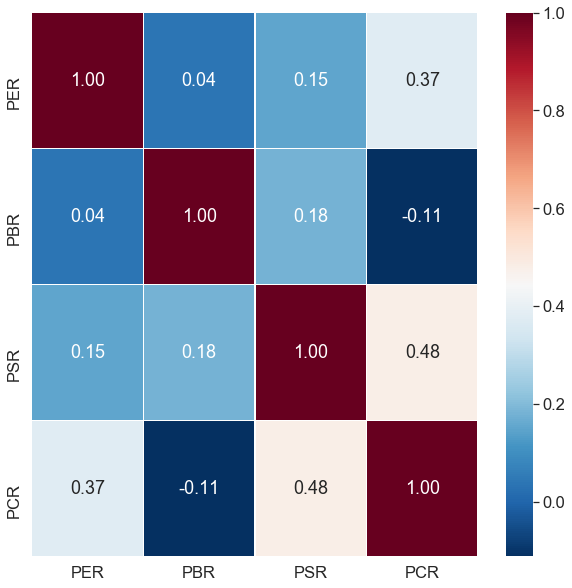

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10,10))
ax.set_ylim(3.5,0)
sns_heatmap = sns.heatmap(ex.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='RdBu_r')

In [232]:
sns_heatmap.get_ylim()

(4.0, 0.0)

## F-Score

** 조건이 충족하면 1점 아니면 0점 부여 **
* 당기순이익이 0 이상인가?
* 영업현금흐름이 0 이상인가?
* ROA가 전년 대비 증가했는가?
* 영업현금흐름이 순이익보다 높은가?
* 부채비율이 전년 대비 감소했는가?
* 유동비율이 전년 대비 증가했는가?
* 당해 신규주식 발행을 하지 않았는가?
* 매출총이익이 전년 대비 증가했는가?
* 자산회전율이 전년 대비 증가했는가?

=> 계량적으로 우량기업 표시

In [233]:
date = '2015/12'
(fs_df[date]['당기순이익']>0).value_counts()

True     1523
False     736
Name: 당기순이익, dtype: int64

In [234]:
fs_df.shape

(2259, 266)

In [235]:
date = '2015/12'
fscore_df = fs_df[date]
fscore_df['당기순이익점수'] = fscore_df['당기순이익']>0
fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름']>0
fscore_df['더큰영업활동점수'] = fscore_df['영업활동으로인한현금흐름']>fscore_df['당기순이익']

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [236]:
fscore_df.head()

,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수
A060310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
A095570,290,10556,13272,743,-1063,3980,17252,True,False,False
A068400,171,6321,8063,403,-532,2274,10338,True,False,False
A006840,-374,28071,15939,1063,1412,9016,24955,False,True,True
A054620,78,2932,1893,121,-308,1096,2990,True,False,False


In [237]:
fscore_df[['당기순이익점수','영업활동점수','더큰영업활동점수']].sum(axis=1)

A060310    0
A095570    1
A068400    1
A006840    2
A054620    1
          ..
A189980    2
A000540    3
A003280    3
A037440    3
A238490    0
Length: 2259, dtype: int64

#### fscore 종합 점수 Def

In [238]:
def get_fscore(fs_df, index_date, num):
    fscore_df = fs_df[index_date]
    fscore_df['당기순이익점수'] = fscore_df['당기순이익']>0
    fscore_df['영업활동점수'] = fscore_df['영업활동으로인한현금흐름']>0
    fscore_df['더큰영업활동점수'] = fscore_df['영업활동으로인한현금흐름']>fscore_df['당기순이익']
    fscore_df['종합점수'] = fscore_df[['당기순이익점수','영업활동점수','더큰영업활동점수']].sum(axis=1)
    fscore_df = fscore_df[fscore_df['종합점수']==3]
    return fscore_df[:num]

In [239]:
get_fscore(fs_df, '2015/12',10)

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A027410,1528,43343,8479,1836,3593,7737,16216,True,True,True,3
A138930,5305,NaN,840889,6962,7464,61907,902795,True,True,True,3
A001460,132,1822,3133,211,281,3781,6915,True,True,True,3
A001040,5511,211667,136987,12253,22956,98635,235621,True,True,True,3
A079160,522,11935,9724,669,1517,4452,14176,True,True,True,3
A035760,1120,23086,16381,2097,4404,13501,29882,True,True,True,3
A000120,490,50558,21288,1866,1719,23717,45005,True,True,True,3
A011150,26,1617,436,56,312,500,936,True,True,True,3
A097950,2537,129245,83660,7514,11546,53852,137513,True,True,True,3
A037560,597,11826,10491,1050,3682,9512,20003,True,True,True,3


### 모멘텀
**추세추종 전략**
* 최근 기간으 ㅣ가격 추세가 일정 시간 지속이 될 것이라 가정하고, 가격(수익률)이 상승한 주식을 사고 반대로 가격이 하락한 주식을 파는 전략을 의임.
* 최근 n개월의 수익률을 계산하여 이를 종목들끼리 서로 비교하는 방법
* 수익률이 높은 순으로 x개 투자하는 방법으로 모멘텀 전략을 계량화하여 구현할 수 있음.

In [240]:
price_path = './Data/quant/가격데이터.xlsx'
price_df = pd.read_excel(price_path, index_col=0)
price_df.head()

,060310,095570,068400,006840,054620,265520,211270,027410,282330,138930,...,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
price_df.pct_change(250).head()

,060310,095570,068400,006840,054620,265520,211270,027410,282330,138930,...,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
2013-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
price_df.pct_change(250).loc['2016-12-29']

060310    0.237778
095570   -0.310710
068400   -0.251121
006840   -0.063545
054620    1.407187
            ...   
189980   -0.602601
000540   -0.132319
003280   -0.227754
037440    0.280397
238490         NaN
Name: 2016-12-29 00:00:00, Length: 2266, dtype: float64

In [243]:
momentum_df = pd.DataFrame(price_df.pct_change(250).loc['2016-12-29'])
momentum_df.columns = ['모멘텀']
momentum_df['모멘텀순위'] = momentum_df['모멘텀'].rank(ascending=False)
momentum_df = momentum_df.sort_values(by='모멘텀순위')

In [244]:
momentum_df.head()

,모멘텀,모멘텀순위
225530,5.816741,1.0
065060,4.498208,2.0
049120,4.452941,3.0
014200,3.949622,4.0
063760,3.400000,5.0


In [245]:
def get_momentum_rank(price_df, index_date, date_range, num):
    momentum_df = pd.DataFrame(price_df.pct_change(date_range).loc[index_date])
    momentum_df.columns = ['모멘텀']
    momentum_df['모멘텀순위'] = momentum_df['모멘텀'].rank(ascending=False)
    momentum_df = momentum_df.sort_values(by='모멘텀순위')
    return momentum_df[:num]

In [246]:
get_momentum_rank(price_df, '2016-12-29', 250, 20).head()

,모멘텀,모멘텀순위
225530,5.816741,1.0
065060,4.498208,2.0
049120,4.452941,3.0
014200,3.949622,4.0
063760,3.400000,5.0


### 저평가 주식 Def + Fscore Def

In [247]:
date = '2015/12'
value = make_value_combo(['PER','PBR','PSR','PCR'], invest_df, date, None)
quality = get_fscore(fs_df, date, None)

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [248]:
value_quality = pd.merge(value, quality, how='outer', left_index=True, right_index=True)
value_quality.head()

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A000020,40.54,1032.0,0.98,629.0,1.02,953.5,13.01,844.0,754.0,56,2232,871,48,198,2301,3172,True,True,True,3.0
A000040,NaN,NaN,3.15,1467.0,2.64,1407.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,31.61,944.5,0.80,461.0,1.48,1158.5,11.69,772.0,723.0,167,3576,6557,390,399,6630,13186,True,True,True,3.0
A000060,10.16,326.0,1.15,794.0,NaN,NaN,NaN,NaN,NaN,1690,NaN,133513,2247,9596,14811,148325,True,True,True,3.0
A000070,30.33,918.5,1.04,698.0,0.65,666.5,12.10,790.0,654.0,780,21696,12751,1067,899,17964,30714,True,True,True,3.0


In [249]:
value_quality_filtered = value_quality[value_quality['종합점수']==3]
value_quality_filtered.head()

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A000020,40.54,1032.0,0.98,629.0,1.02,953.5,13.01,844.0,754.0,56,2232,871,48,198,2301,3172,True,True,True,3.0
A000050,31.61,944.5,0.80,461.0,1.48,1158.5,11.69,772.0,723.0,167,3576,6557,390,399,6630,13186,True,True,True,3.0
A000060,10.16,326.0,1.15,794.0,NaN,NaN,NaN,NaN,NaN,1690,NaN,133513,2247,9596,14811,148325,True,True,True,3.0
A000070,30.33,918.5,1.04,698.0,0.65,666.5,12.10,790.0,654.0,780,21696,12751,1067,899,17964,30714,True,True,True,3.0
A000080,31.31,937.0,1.19,831.5,0.87,857.5,9.63,644.5,702.0,534,19075,21359,1340,3040,13246,34605,True,True,True,3.0


In [250]:
vq_df = value_quality_filtered.sort_values(by='종합순위')
vq_df.head()

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A037030,1.64,8.0,0.40,53.5,0.06,14.0,1.23,12.0,2.0,47,1195,281,61,123,190,470,True,True,True,3.0
A058650,4.52,37.0,0.34,28.0,0.13,61.5,1.75,20.5,3.0,2071,40482,24038,2876,5009,27877,51915,True,True,True,3.0
A013580,5.67,83.5,0.32,19.5,0.06,14.0,3.48,92.5,4.0,169,15222,9068,361,1396,3179,12247,True,True,True,3.0
A003030,6.01,101.0,0.23,4.5,0.13,61.5,2.88,62.0,5.0,458,21917,8467,777,2930,12271,20739,True,True,True,3.0
A010100,7.24,154.0,0.40,53.5,0.08,25.5,2.11,39.0,6.0,143,11325,4416,118,468,2754,7171,True,True,True,3.0


In [251]:
def get_value_quality(invest_df, fs_df, index_date, num):
    value = make_value_combo(['PER','PBR','PSR','PCR'], invest_df, index_date, None)
    quality = get_fscore(fs_df, index_date, None)
    value_quality = pd.merge(value, quality, how='outer', left_index=True, right_index=True)
    value_quality_filtered = value_quality[value_quality['종합점수']==3]
    vq_df = value_quality_filtered.sort_values(by='종합순위')
    return vq_df[:num]

In [252]:
get_value_quality(invest_df, fs_df, '2016/12', 20)

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,PER,PER순위,PBR,PBR순위,PSR,PSR순위,PCR,PCR순위,종합순위,당기순이익,매출액,부채,영업이익,영업활동으로인한현금흐름,자본,자산,당기순이익점수,영업활동점수,더큰영업활동점수,종합점수
A101000,0.79,4.0,0.16,1.0,0.06,9.5,0.63,4.0,1.0,95,1284,872,151,155,449,1321,True,True,True,3.0
A076340,2.42,11.0,0.34,27.0,0.13,53.0,1.94,33.0,3.0,62,1200,67,65,108,447,513,True,True,True,3.0
A058650,5.73,82.5,0.30,14.0,0.13,53.0,1.77,26.5,6.0,1619,40343,22537,2348,3825,29241,51779,True,True,True,3.0
A010100,6.40,123.5,0.36,35.5,0.07,14.0,2.04,37.0,7.0,137,11365,4400,129,413,2496,6897,True,True,True,3.0
A001940,4.94,56.0,0.30,14.0,0.21,133.0,2.81,71.0,11.0,779,10581,2200,871,1150,12740,14940,True,True,True,3.0
A013870,5.04,60.0,0.43,66.5,0.19,109.5,2.19,44.0,12.0,195,4951,2374,243,419,2290,4663,True,True,True,3.0
A004140,3.81,27.5,0.62,232.5,0.10,30.0,1.36,13.0,14.0,146,5626,4394,257,272,1491,5885,True,True,True,3.0
A037350,3.47,22.0,0.46,93.0,0.19,109.5,3.20,86.5,15.0,234,4256,1623,263,338,1874,3497,True,True,True,3.0
A002030,6.48,128.0,0.34,27.0,0.21,133.0,2.66,58.0,16.0,676,10953,4814,861,1114,12251,17065,True,True,True,3.0
A200880,4.14,37.5,0.57,189.0,0.16,76.5,2.21,45.0,17.5,939,24029,11222,1078,1165,6796,18018,True,True,True,3.0


### 백테스트

* 일종의 재현 시험으로 어떤 전략을 갖고 과거로 돌아가서 같은 방법으로 투자한다면 어떻게 되었을지 시뮬레이션해보는 것
* 예를들어, PBR이 낮은 주식 20개를 매년 초에 사는 전략을 구상했다고 했을 때 과거 N년 동안 이런 방법으로 투자했다면 과연 어떤 결과가 나왔을지 시뮬레이션해 보는 작업임

In [348]:
low_pbr_st = get_value_rank(invest_df, 'PBR', '2015/12', 20)
low_pbr_st.head()

,PBR,PBR순위
A073010,0.02,1.0
A007280,0.13,2.0
A101000,0.19,3.0
A003480,0.23,4.5
A003030,0.23,4.5


In [349]:
code_list = []
for code in low_pbr_st.index:
    code_list.append(code.replace('A',''))
    
pbr_price = price_df[code_list]['2016-6':]
pbr_price.head()

,073010,007280,101000,003480,003030,019010,002220,101680,114920,001230,001530,082740,016610,011160,005010,008830,003830,071090,013580,086790
2016-06-01,961.0,2050.0,5923.0,4900.0,60446.0,11450.0,19700.0,3695.0,8560.0,8300.0,60002.0,2531.0,3610.0,4940.0,14300.0,26700.0,103500.0,20450.0,11400.0,25150.0
2016-06-02,994.0,2050.0,5797.0,4900.0,60531.0,11900.0,19750.0,3735.0,8800.0,8260.0,59906.0,2510.0,3570.0,4950.0,14250.0,26500.0,103000.0,20200.0,11500.0,25050.0
2016-06-03,939.0,2050.0,5955.0,5030.0,59764.0,12200.0,19800.0,3780.0,8750.0,8180.0,59811.0,2545.0,3565.0,4840.0,14150.0,26750.0,106000.0,19850.0,11400.0,24950.0
2016-06-07,961.0,2050.0,5902.0,5060.0,61981.0,12550.0,19300.0,3810.0,9750.0,8710.0,59432.0,2548.0,3625.0,4925.0,14350.0,26350.0,106000.0,20000.0,11250.0,25100.0
2016-06-08,974.0,2050.0,5797.0,4980.0,60446.0,12950.0,19300.0,3730.0,9500.0,8830.0,59335.0,2580.0,3615.0,5100.0,14150.0,26150.0,105500.0,19800.0,11150.0,25500.0


In [350]:
pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns:
    temp = int(5000000/pbr_price[code][0])
    pf_stock_num[code] = temp
    stock_amount = stock_amount + temp*pbr_price[code][0]
    
cash_amount = 100000000 - stock_amount

In [351]:
print(pf_stock_num)

{'073010': 5202, '007280': 2439, '101000': 844, '003480': 1020, '003030': 82, '019010': 436, '002220': 253, '101680': 1353, '114920': 584, '001230': 602, '001530': 83, '082740': 1975, '016610': 1385, '011160': 1012, '005010': 349, '008830': 187, '003830': 48, '071090': 244, '013580': 438, '086790': 198}


In [358]:
stock_pf = 0
for code in pbr_price.columns:
    stock_pf = stock_pf + pbr_price[code]*pf_stock_num[code]
    
low_pbr_backtest = pd.DataFrame({'주식포트폴리오':stock_pf[:'2018-5']})

In [359]:
low_pbr_backtest.head()

,주식포트폴리오
2016-06-01,99816252.0
2016-06-02,100057021.0
2016-06-03,100050789.0
2016-06-07,101441833.0
2016-06-08,101279568.0


In [360]:
low_pbr_backtest['현금포트폴리오'] = [cash_amount]*len(low_pbr_backtest)
low_pbr_backtest.head()

,주식포트폴리오,현금포트폴리오
2016-06-01,99816252.0,183748.0
2016-06-02,100057021.0,183748.0
2016-06-03,100050789.0,183748.0
2016-06-07,101441833.0,183748.0
2016-06-08,101279568.0,183748.0


In [361]:
low_pbr_backtest['종합포트폴리오'] = low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화율'] = low_pbr_backtest['종합포트폴리오'].pct_change()
low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000-1

In [362]:
low_pbr_backtest.head()

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99816252.0,183748.0,100000000.0,NaN,0.000000
2016-06-02,100057021.0,183748.0,100240769.0,0.002408,0.002408
2016-06-03,100050789.0,183748.0,100234537.0,-0.000062,0.002345
2016-06-07,101441833.0,183748.0,101625581.0,0.013878,0.016256
2016-06-08,101279568.0,183748.0,101463316.0,-0.001597,0.014633


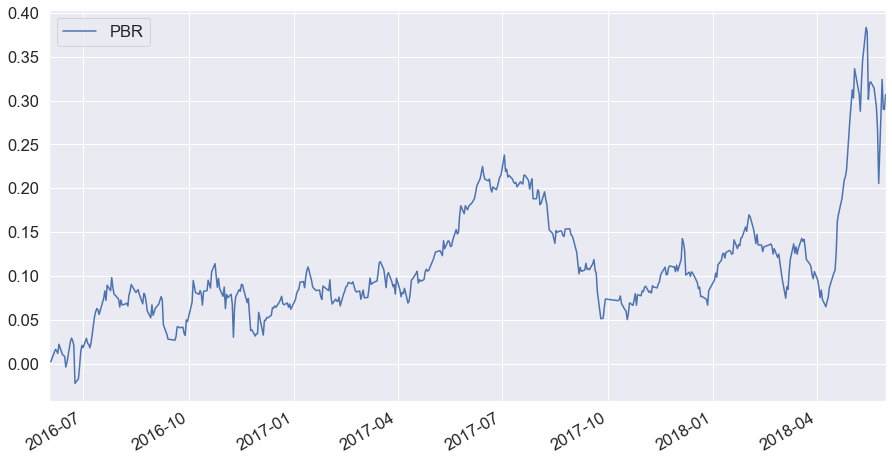

In [363]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
low_pbr_backtest['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

In [263]:
def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):
    
    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))
        
    strategy_price = price_df[code_list][start_date:end_date]
    
    pf_stock_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money/len(strategy_df)
    for code in strategy_price.columns:
        temp = int(each_money/strategy_price[code][0])
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp*strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code]*pf_stock_num[code]
        
    cash_amount = initial_money - stock_amount
    
    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount]*len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money-1
    
    return backtest_df

In [264]:
# strategy_date = '2015/12'
# start_date = '2016-6'
# end_date = '2017-5'
# initial_money = 100000000

# low_per = get_value_rank(invest_df, 'PER',strategy_date, 20)
# per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

In [265]:
# price_df[start_date].iloc[0].dropna().index

In [266]:
# new_code_list = []
# for code in price_df[start_date].iloc[0].dropna().index:
#     new_code_list.append('A'+code)

In [267]:
def select_code_by_price(price_df, data_df, start_date):
    new_code_list=[]
    for code in price_df[start_date].iloc[0].dropna().index:
        new_code_list.append('A'+code)
    
    selected_df = data_df.loc[new_code_list]
    return selected_df

In [286]:
strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [287]:
per_backtest.head(10)

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99766303.0,233697.0,100000000.0,NaN,0.000000
2016-06-02,100083102.0,233697.0,100316799.0,0.003168,0.003168
2016-06-03,100108105.0,233697.0,100341802.0,0.000249,0.003418
2016-06-07,101023285.0,233697.0,101256982.0,0.009121,0.012570
2016-06-08,101500094.0,233697.0,101733791.0,0.004709,0.017338
2016-06-09,101389780.0,233697.0,101623477.0,-0.001084,0.016235
2016-06-10,101600398.0,233697.0,101834095.0,0.002073,0.018341
2016-06-13,99768423.0,233697.0,100002120.0,-0.017990,0.000021
2016-06-14,99936288.0,233697.0,100169985.0,0.001679,0.001700
2016-06-15,100468677.0,233697.0,100702374.0,0.005315,0.007024


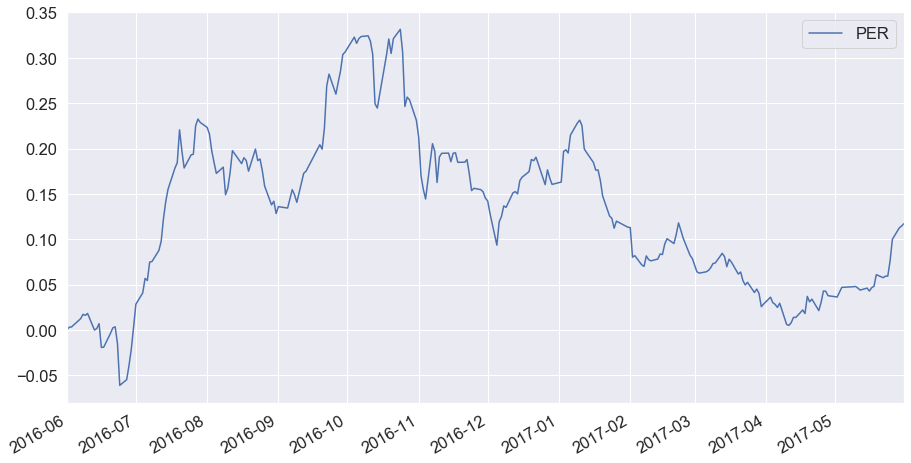

In [288]:
plt.figure(figsize=(15,8))
per_backtest['총변화율'].plot(label='PER');plt.legend()
plt.show()

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


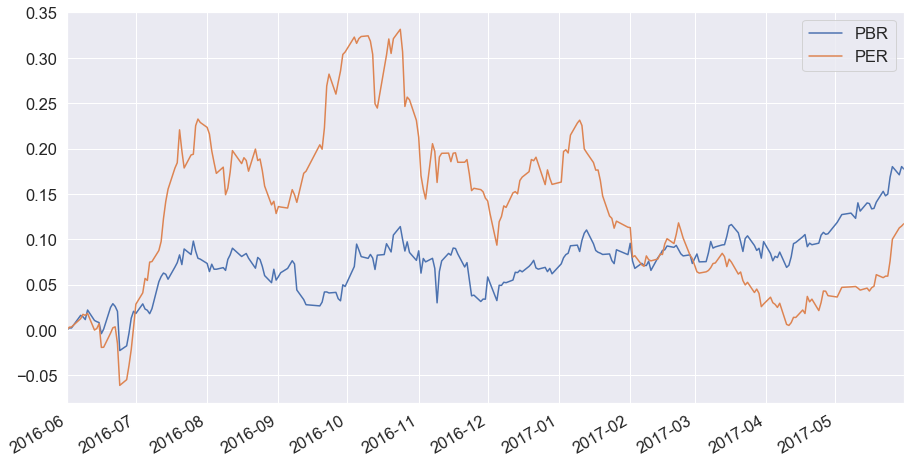

In [271]:
strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

low_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, 20)
low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(15,8))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
plt.legend()
plt.show()

#### PBR 20%기준 분할 그래프

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


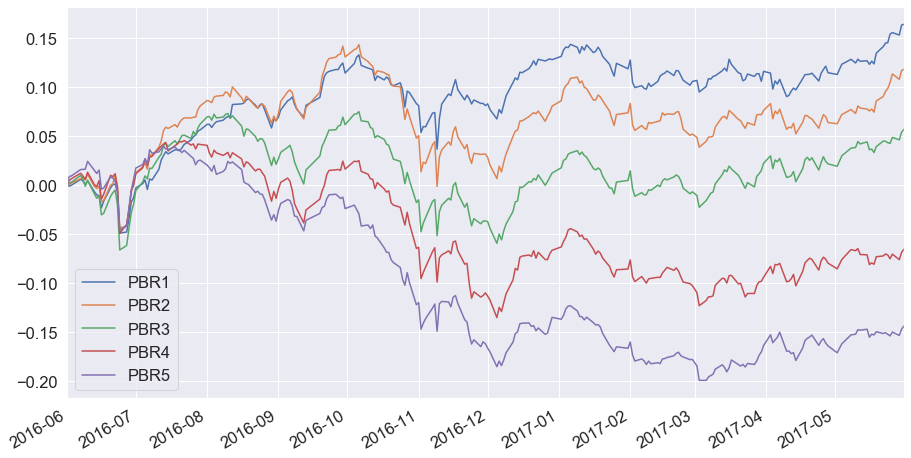

In [272]:
all_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(15,8))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


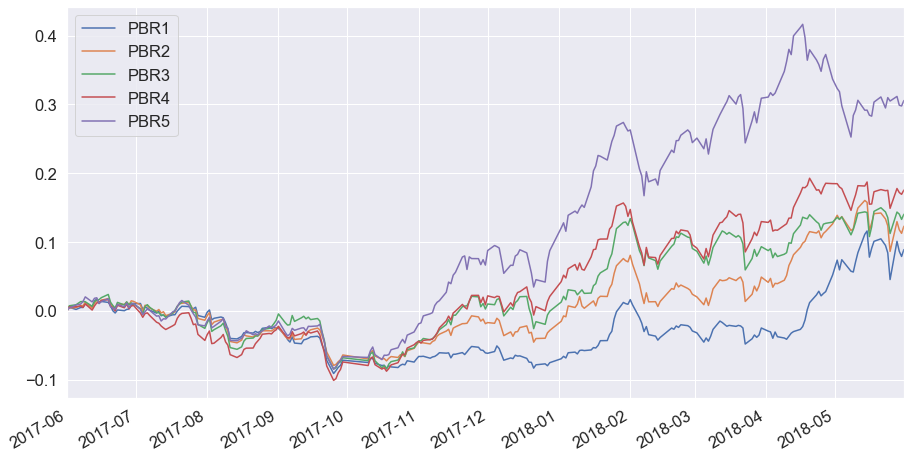

In [273]:
strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 100000000

all_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(15,8))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

In [289]:
f_score_backtest.head(10)

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99309401.0,690599.0,100000000.0,NaN,0.000000
2016-06-02,99398064.0,690599.0,100088663.0,0.000887,0.000887
2016-06-03,99626082.0,690599.0,100316681.0,0.002278,0.003167
2016-06-07,99433368.0,690599.0,100123967.0,-0.001921,0.001240
2016-06-08,99830776.0,690599.0,100521375.0,0.003969,0.005214
2016-06-09,98791493.0,690599.0,99482092.0,-0.010339,-0.005179
2016-06-10,98725916.0,690599.0,99416515.0,-0.000659,-0.005835
2016-06-13,96980677.0,690599.0,97671276.0,-0.017555,-0.023287
2016-06-14,95568255.0,690599.0,96258854.0,-0.014461,-0.037411
2016-06-15,95358586.0,690599.0,96049185.0,-0.002178,-0.039508


C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

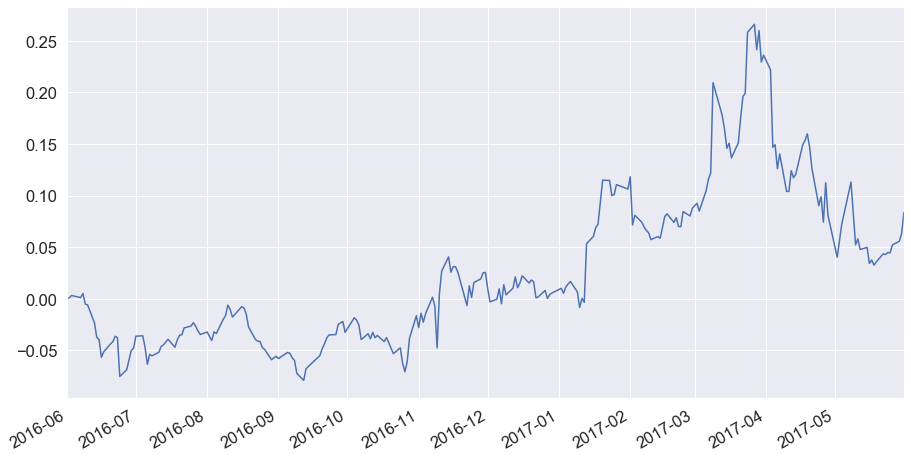

In [274]:
strategy_date = '2015/12'
start_date = '2016-6'
end_date = '2017-5'
initial_money = 100000000

f_score_result = get_fscore(select_code_by_price(price_df, fs_df, start_date), strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score_result, start_date, end_date, initial_money)


plt.figure(figsize=(15,8))
f_score_backtest['총변화율'].plot()
plt.show()

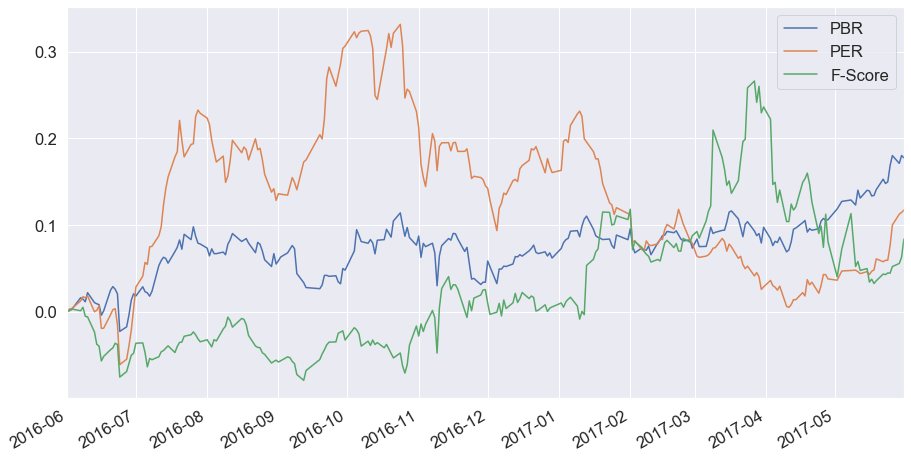

In [275]:
plt.figure(figsize=(15,8))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
f_score_backtest['총변화율'].plot(label='F-Score')
plt.legend()
plt.show()

In [291]:
def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year-2) + '/12'
    else:
        strategy_date = str(temp_year-1) + '/12'
    return strategy_date

In [292]:
start_date = '2015-6'
end_date = '2018-5'

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

for temp in range(start_year, end_year):
    print(str(temp) + '-6', str(temp+1) + '-5')

2015-6 2016-5
2016-6 2017-5
2017-6 2018-5


In [293]:
start_date1 = '2016-6'
end_date1 = '2017-5'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)

start_date2 = '2017-6'
end_date2 = '2018-5'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = 100000000

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [294]:
start_date1 = '2016-6'
end_date1 = '2017-5'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)
temp_end1 = per_backtest1[end_date1].index[0]
per_backtest1 = per_backtest1[:temp_end1]

start_date2 = '2017-6'
end_date2 = '2018-5'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = per_backtest1['종합포트폴리오'][-1]

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
temp_end2 = per_backtest2[end_date2].index[0]
per_backtest2 = per_backtest2[:temp_end2]

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [295]:
total_backtest = pd.concat([per_backtest1[:-1], per_backtest2])
total_backtest['일변화율'] = total_backtest['종합포트폴리오'].pct_change()
total_backtest['총변화율'] = total_backtest['종합포트폴리오']/total_backtest['종합포트폴리오'][0]-1

In [296]:
start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [297]:
total_df.head()

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2016-06-01,99766303.0,233697.0,100000000.0,NaN,0.000000
2016-06-02,100083102.0,233697.0,100316799.0,0.003168,0.003168
2016-06-03,100108105.0,233697.0,100341802.0,0.000249,0.003418
2016-06-07,101023285.0,233697.0,101256982.0,0.009121,0.012570
2016-06-08,101500094.0,233697.0,101733791.0,0.004709,0.017338


In [298]:
per_backtest.head()

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2017-06-01,112135199.0,89991.0,112225190.0,NaN,0.000000
2017-06-02,114371370.0,89991.0,114461361.0,0.019926,0.019926
2017-06-05,114817208.0,89991.0,114907199.0,0.003895,0.023898
2017-06-07,114460804.0,89991.0,114550795.0,-0.003102,0.020723
2017-06-08,115181096.0,89991.0,115271087.0,0.006288,0.027141


C:\Users\YC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


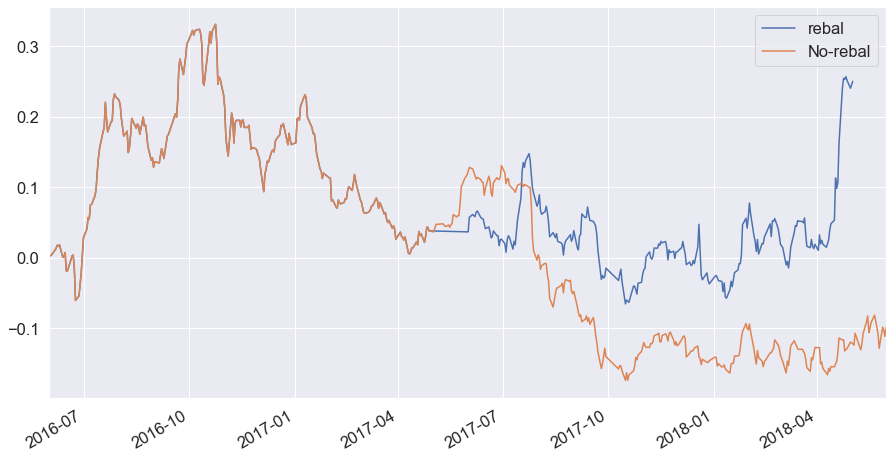

In [299]:
start_date = '2016-6'
end_date = '2018-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/total_df['종합포트폴리오'][0] - 1

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(15, 8))
total_backtest['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()